<a href="https://colab.research.google.com/github/Settodestridor/IA-aplica-EQ/blob/main/IA_ppgeq_Aula05_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificadores de Naive-Bayes

Classificadores de Naive Bayes são uma categoria de classificadores **probabilísticos**, onde o objetivo é:




*    Determinar a probabilidade de uma amostra pertencer a uma classe $y_i$ dado que o vetor dos atributos é $\mathbf{x}_i$:
$$
P(y_i | \mathbf{x}_i)
$$

A base desses classificadores é o Teorema de Bayes, apresentado a seguir.


#1) Teorema de Bayes

O teorema de Bayes é uma ferramenta para mensuar a **probabilidade condicionada** de um evento (probabilidade de um evento ocorrer, dado que outro evento já ocorreu).



---

**Definições**:

*   Conhecimento *a priori* : aquele adquirido independente de qualquer experiência, assumido (ou definido) como verdadeiro;

*   Conhecimento *a posteriori* : aquele que depende da experiência (observação), não pode ser assumido sem que seja feita uma análise do sistema.


---


O Teorema de Bayes é definido matematicamente da seguinte forma:

$$
P(A|B) = \dfrac{P(B|A) P(A)}{P(B)}
$$

onde

$P(A|B)$: probabilidade condicional de $A$ ocorrer dado que $B$ ocorre (*a posteriori*)

$P(B|A)$: probabilidade condicional de $B$ ocorrer dado que $A$ ocorre (*a posteriori*)

$P(A)$: probabilidade de $A$ ocorrer, independente de $B$ (*a priori* )

$P(B)$: probabilidade de $B$ ocorrer, independente de $A$ (*a priori* )







**Exemplo de análise de probabilidade condicionada**

Considere um processo físico onde foram avaliadas 100 amostra em duas temperaturas diferentes (alta e baixa) e os dados foram classificados em duas categorias (positivo e negativo). Qual a chance de um processo positivo ter temperatura alta?

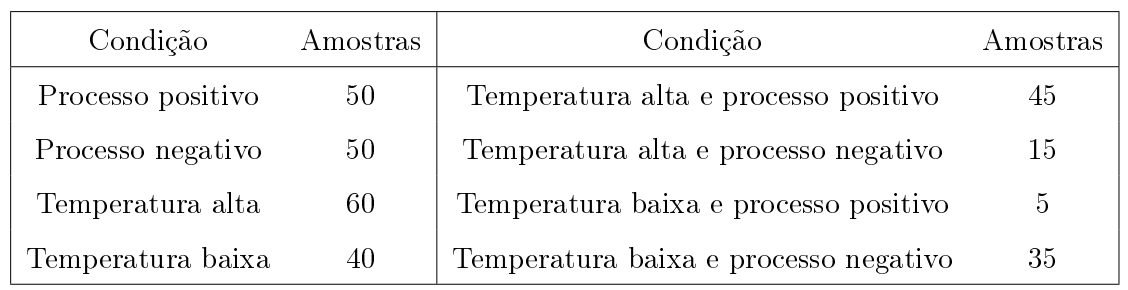

Podemos definir esta probabilidade como:

$$
P(alta|positivo)
$$

Usando o teorema de Bayes, podemos definir que:
$$
P(alta|positivo) = \dfrac{P(positivo|alta) P(alta)}{P(positivo)}
$$

As probabilidades *a priori* pode ser obtidas com base nas informações do lado esquerdo da tabela:


*   $P(positivo) = 50/100 = 0.5$
*   $P(alta) = 60/100 = 0.6$


Para determinar as probabilidades *a posteriori*, precisamos dos dados do lado direito da tabela. Neste exemplo, temos 60 amostras com temperatura alta, 45 postivas e 15 negativas. Então, a probabilidade de uma amsotra com temperatura alta ser positiva é:

*   $P(positivo|alta) =  45/60 = 0.75$

Assim:
$$
P(alta|positivo) = \dfrac{(0.75) (0.6)}{(0.5)} = 0.9
$$


#2) Classificação Bayesiana


Considere um conjunto de dados:
$$
T = ((\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), (\mathbf{x}_3, y_3), \ldots, (\mathbf{x}_N, y_N))
$$
onde o vetor dos atributos é dado como:
$$
\mathbf{x}_i = (x_{i,1}, x_{i,2}, \ldots, x_{i,D})
$$

No contexto de algoritmos de classificação, o objetivo da aplicação do teorema de Bayes é responder a seguinte pergunta:

- Dada uma amostra com vetor dos atributos $\mathbf{x}_i$, qual a probabilidade de ela pertencer à classe $y_i$?

Isso pode ser expresso da seguinte forma:

$$
P(y_i|\mathbf{x}_i) = \dfrac{P(\mathbf{x}_i| y_i) P(y_i)}{P(\mathbf{x}_i)}
$$

Se avaliarmos a probabilidade em relação a todas as classes $y_i$, podemos determinar qual delas tem a maior probabilidade de ser a verdadeira.


---


**Obs.:** Estes algoritmos podem ser aplicados diretamente em problemas multiclasse!



---


**Objetivo**: Avaliar todos os valores de $y_i$ buscando maximizar a probabilidade *a posteriori* $P(y_i|\mathbf{x}_i)$ (estratégia chamada de *máximo a posteriori* (MAP))

Na expressão anterior, a probabilidade *a priori* $P(\mathbf{x}_i)$ que aparece no denominador representa a probabilidade de uma amostra ser representada pelo vetor $\mathbf{x}_i$. Como isso não depende de $y_i$, podemos focar em maximizar o numerador:

$$
\max_{y}\,\, P(\mathbf{x}_i| y_i) P(y_i)
$$

Agora, temos que calcular os dois termos que aparecem no argumento.


##2.1) Probabilidade *a priori*

O termo de probabilidade a priori $P(y_i)$ representa a chance de uma amostra qualquer pertencer à classe $y_i$. Para obter esse valor,

$$
P(y_i) = \dfrac{\textrm{Número de amostras pertencentes à classe } y_i}{\textrm{Número total de amostras}}
$$

Vamos ilustrar o cálculo destas quantidades no exemplo abaixo, onde será gerado um conjunto de dados com amostras contendo 3 atributos de entrada e pertencendo a 4 classes distintas.

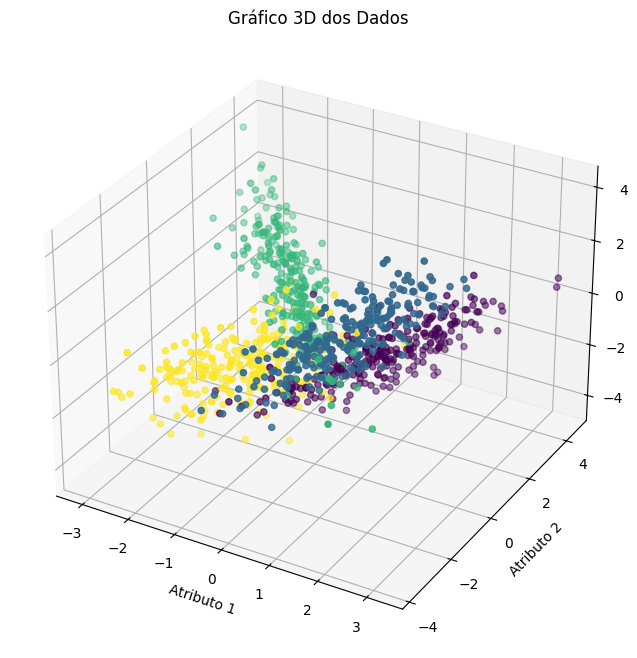

In [ ]:
#Gerando um conjunto de dados para classificação
#Dados com 3 atributos de entrada e 4 possíveis classes de saída (0,1,2,3)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mpl_toolkits.mplot3d import Axes3D

# Gerar um conjunto de dados aleatórios
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, n_classes = 4, random_state=321)

# Criar o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos, colorindo de acordo com a classe
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', marker='o')

# Adicionar legendas e títulos
ax.set_title('Gráfico 3D dos Dados')
ax.set_xlabel('Atributo 1')
ax.set_ylabel('Atributo 2')
ax.set_zlabel('Atributo 3')

plt.show()

#Normalizando e criando grupos de teste e treinamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Normalizando entre 0 e +1
scaler = MinMaxScaler(feature_range = (0,1)) #definindo o intervalo entre 0 e 1, para manter o mesmo que as classes
X_norm = scaler.fit_transform(X) #Normalizando os dados da matriz X e alocando em uma nova variável

#Divivindo em grupos de teste e treinamento
test_group_size = 0.3
seed = 1234
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=test_group_size, random_state=seed)


In [ ]:
#Determinando as probabilidades a priori para o grupo de treinamento
#Para determinar a quantidade de elementos pertencentes a cada calsse, podemos usar a função 'unique' do numpy
#https://numpy.org/doc/stable/reference/generated/numpy.unique.html
unique, counts = np.unique(y_train, return_counts=True) #Retorna um vetor 'unique' com os elementos únicos e outro 'counts' com a quantidade de amostras em cada classe
priors = counts / len(y_train) #vetor com as probabilidades a priori para cada classe
print(unique)
print(priors)

[0 1 2 3]
[0.24571429 0.26571429 0.23571429 0.25285714]


##2.2) Probabilidade *a posteriori*

Com os valores $P(y_i)$ conhecidos para todas as classes, precisamos agora determinar $P(\mathbf{x}_i|y_i)$.

Este termo pode ser entendido como a probabilidade de um elemento pertencente à classe $y_i$ ser descrito exatamente pelo vetor $\mathbf{x}_i$. Com exceção de sistemas muito simples, este valor não pode ser diretamente determinado. É nisso que a abordagem *naive* (ingênua) é aplicada:



---

**Hipótese**: Dado um vetor de atributos com $D$ elementos, será assumido que não existe nenhuma dependência entre os elementos, ou seja, os atributos são mutualmente independentes.

Se dois eventos $A$ e $B$ são independentes, então a probabilidade de ambos ocorrerem é:
$$
P(A,B) = P(A) P (B)
$$

---

$$\,$$

Lembrando, o vetor dos atributos é dado como:
$$
\mathbf{x}_i = (x_{i,1}, x_{i,2}, \ldots, x_{i,D})
$$

Agora, considere a probabilidade de uma amostra da classe $y_i$ ter o *n-ésimo* elemento do vetor $\mathbf{x}_i$  igual a $x_{i,n}$: $P(x_{i,n}|y_i)$

Usando a hipótese anterior, podemos supor que a probabilidade $P(\mathbf{x}_i|y_i)$ será a composição das probabilidades individuais de cada elemento $P(x_{i,n}|y_i)$:

$$
P(\mathbf{x}_i|y_i) = \prod\limits_{n=1}^D P(x_{i,n}|y_i)
$$


Com isso, o problema de otimização pode ser reescrito como:

$$
\max_{y}\,\,  P(y_i)\prod\limits_{n=1}^D P(x_{i,n}|y_i)
$$


Se tivermos muitos atributos, a multiplicação de várias probabilidades pode se tornar um número muito pequeno. Para evitar problemas de representação numérica (*underflow* ), é normal avaliarmos a expressão na forma logarítmica:

$$
\max_{y}\,\,  \log(P(y_i)) + \sum\limits_{n=1}^D \log(P(x_{i,n}|y_i))
$$



Para determinar as probabilidades individuais, temos dois cenários:

*    Se $x_{i,n}$ for uma variável categórica, $P(x_{i,n}|y_i)$ pode ser calculada simplesmente como a fração dos elementos da classe $y_i$ que possuem esse valor de $x_{i,n}$. Neste caso, pode-se aplicar métodos como Naive Bayes multinomial.

*    Se $x_{i,n}$ for uma variável numérica, a probabilidade pode ser calculada utilizando uma *função de densidade de probabilidade*. A significado deste tipo de função será discutido a seguir. Neste caso, podemos aplicar métodos como Naive Bayes Gaussiano.

##2.3) Funções de Densidade de Probabilidade (PDF)



Uma PDF é uma função usada para descrever a probabilidade de uma variável aleatória **contínua** assumir determinados valores.



---


**Interpretação**: Considere que um dos atributos tenha valores entre um valor mínimo $x_{min}$ e um valor máximo $x_{max}$. Assim, a probabilidade (independente da classe) de $x$ estar neste intervalo é 1.

Agora, suponho que o intervalo seja dividido em duas partes:
$$
x_{pt1} = [x_{min}, x_{min} + \Delta x/2] \qquad \qquad x_{pt2} = [x_{min} + \Delta x/2, x_{max}]
$$
onde $\Delta x = x_{max} - x_{min}$

Agora, dado um valor aleatório de $x$ no intervalo $[x_{min}, x_{max}]$, vamos ter uma probabilidade individual de ele estar em cada um dos intervalos. Por exemplo, se no nosso conjunto de dados 40% das amostras possui $x$ entre $x_{min}$ e $x_{min} + \Delta x$, então:

$$
P(x_{pt1}) = 0.4  \qquad \qquad P(x_{pt2}) = 0.6
$$


Suponha agora que o intervalo seja dividido em um número *infinito* de subintervalos, com tamanho infinitesimal $dx$. A função que relaciona o número de amostas presentes em cada um destes subintervalos se torna uma função contínua e é chamada de *função de densidade de probabilidade*.

**Obs.:** A *densidade de probabilidade* representa a probabilidade *por intervalo de comprimento* !

---



Uma PDF $p(x)$ possui algumas propriedades importantes:

*    Deve ser uma função definida positiva em $-\infty \leq  x \leq \infty$:
$$
p(x)\geq 0
$$

*    Se avaliada sobre todo o domínio, deve contemplar todas as amostras:

$$
\int_{-\infty}^{\infty} p(x) dx = 1
$$

*     A probabilidade de um ponto $x=x_1$ cair em um intervalo $[a,b]$ é:
$$
P(a\leq x_1 \leq b) = \int_a^b p(x) dx
$$


Para obter a PDF para um conjunto de dados, precisamos assumir alguma distribuição para os pontos. É comum assumir uma distribuição **normal**. Neste caso, a PDF será uma Gaussiana:
$$
p(x) = \dfrac{1}{\sqrt{2 \pi \sigma^2}}e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

onde $\mu$ é a média e $\sigma^2$ a variância.


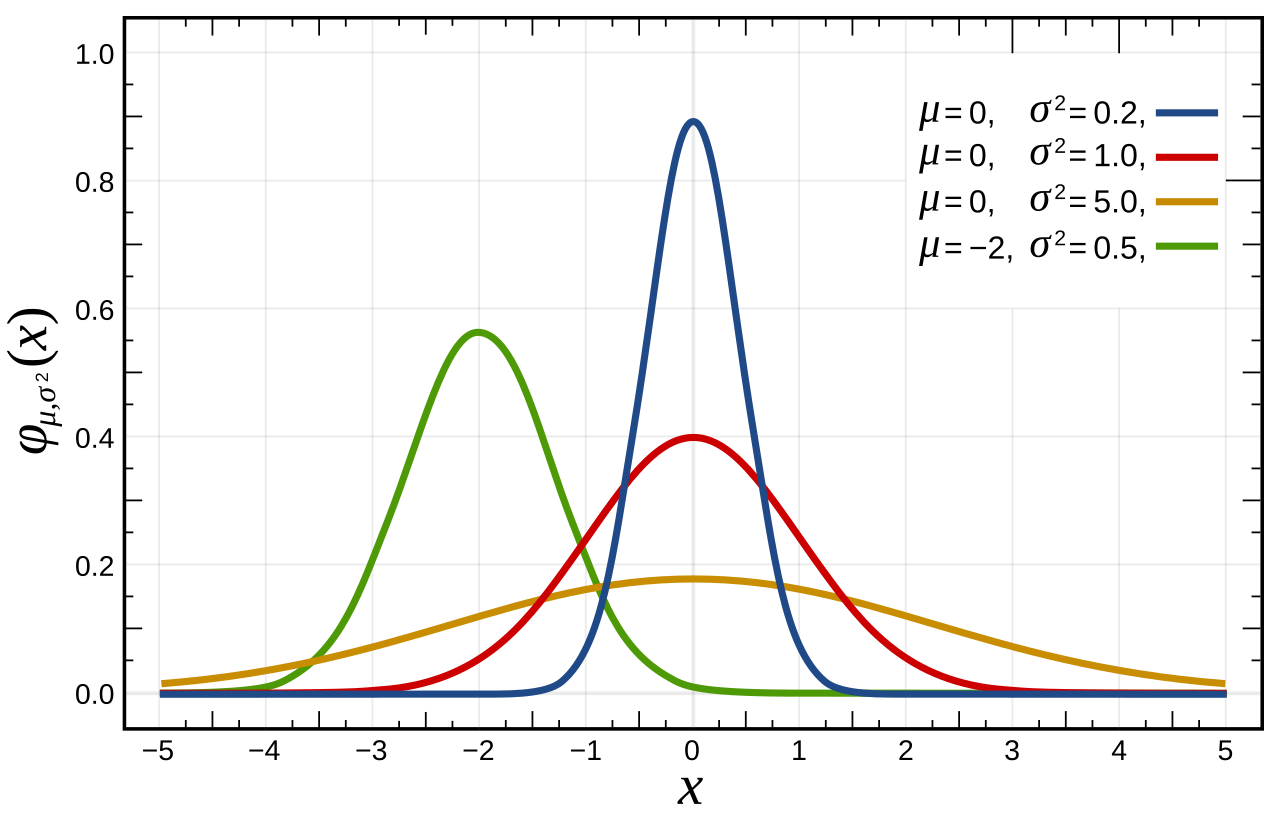

##2.4) Otimização em Função das PDF's

A PDF $p(x)$ representa a distribuição associada com todos os elementos do conjunto, independente da classe a qual eles pertençam.

Se considerarmos somente os elementos de uma dada classe $y_i$, a PDF obtida será identificada por $p_{y_i}(x)$.

Esta função $p_{y_i}(x)$ pode ser interpretada como a probabilidade de um elemento da classe $y_i$ possuir um dado atributo em um intervalo infinitesimalmente próximo a $x$. Assim, essa função tem uma interpretação muito similar a probabilidade $P(x|y_i)$.

O Teorema de Bayes pode ser representado para variáveis contínuas em função das PDF's como:
$$
P(y_i|x) = \dfrac{p_{y_i}(x) P(y_i)}{p(x)}
$$

$$
\,
$$

Agora, considere novamente que existem $D$ atributos associados com cada elemento do vetor $\mathbf{x}_i$, ou seja, irão existir $D$ PDF's da forma $p_{y_i}(x_{i,n})$. Usando a mesma hipótese de que os atributos são independentes, vamos considerar que:

$$
p_{y_i}(\mathbf{x}) = \prod\limits_{n=1}^D p_{y_i}(x_{i,n})
$$

Como o objetivo é encontrar a classe $y_i$ que maximize a probabilidade $P(y_i|\mathbf{x}_{i,n})$, o problema de otimização pode ser representado como:

$$
\max_y \qquad P(y_i)  \prod\limits_{n=1}^D p_{y_i}(x_{i,n})
$$

ou na forma logarítimica:

$$
\max_y \qquad \log(P(y_i)) + \sum\limits_{n=1}^D \log(p_{y_i}(x_{i,n}))
$$

Para finalizar o problema, precisamos agora obter as funções $p_{y_i}(x_{i,n})$. Nesta etapa, podemos optar por diferentes *variantes* dos classificadores de Naive Bayes.  



#3) Naive Bayes Gaussiano

Essa abordagem assume que os dados seguem uma distribuição normal. Com base no conjunto de treinamento, precisamos obter $D \times C$ PDF's, onde $D$ é o número de atributos e $C$ o número de classes presentes.

A distribuição Guassiana para a classe $i$ associado com a atributo $j$ é representada como:

$$
p_{i,j}(x) = \dfrac{1}{\sqrt{2 \pi \sigma_{i,j}^2}} \,\exp\left(-\frac{(x - \mu_{i,j})^2}{2 \sigma_{i,j}^2}\right)
$$

onde a média e a variância são calculadas para cada subconjunto individual, como:

$$
\mu_{i,j} = \frac{1}{N_{i}} \sum_{j=1}^{N_{i}} x_j \qquad \qquad \sigma_{i,j}^2 = \frac{1}{N_i-1} \sum_{j=1}^{N_i} (x_j - \mu_{i,j})^2
$$

sendo que esses parâmetros são calculados com os elementos $x_j$ associados com a classe $y_i$ e $N_{i}$ é o número total de amostras da classe $i$.

**Obs.:** As pdf's são obtidas utilizando o conjunto de *dados de treinamento*, sendo equivalentes aos parâmetros ajustados para as funções preditoras.



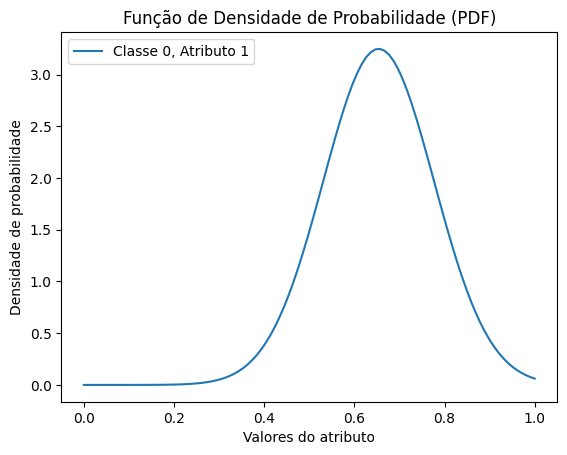

In [ ]:
#Exemplo: Obtenho para uma classe e para um atributo:
class_data_1 = X_train[y_train == 0] #Todos os dados que são rotulados como classe 0
class_data_1_1 = class_data_1[:,0] #Valores do primeiro atributo para os dados rotulados como classe 0
mean_1_1 = np.mean(class_data_1_1) #Média do primeiro atributo para os dados rotulados como classe 0
variance_1_1 = np.var(class_data_1_1) #Variância do primeiro atributo para os dados rotulados como classe 0

def pdf_gaussian (x, mean, variance):
  return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean) ** 2) / (2 * variance))

x_values = np.linspace(0, max(class_data_1_1), 100)
pdf_values = pdf_gaussian(x_values, mean_1_1, variance_1_1)

# Plotar a PDF
plt.plot(x_values, pdf_values, label=f"Classe 0, Atributo 1")
plt.title("Função de Densidade de Probabilidade (PDF)")
plt.xlabel("Valores do atributo")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.show()


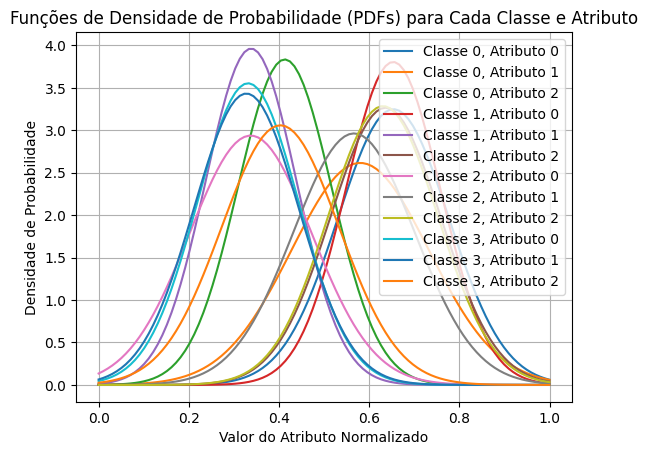

In [ ]:
#Generalizando para todas as classes e todos os atributos
#Determinando o número de classes e de atributos presentes no conjunto de dados
num_class = len(unique) #Número de classes presentes
num_features = X_train.shape[1] #Número de atributos presente
#inicializando matrizes 'means' e 'variances' para armazenar os valores das médias e das variâncias
means = np.zeros((num_class, num_features))  # num_classes classes e num_features atributos -> linha:classes, coluna:atributos
variances = np.zeros((num_class, num_features))

pdfs = np.zeros((num_class, num_features, len(x_values)))  # Para armazenar as PDFs

# Calculando média e desvio padrão para cada classe e cada atributo
for class_label in np.unique(y_train):
    class_data = X_train[y_train == class_label] #Dados que pertencem a uma determinada classe

    for attribute in range(class_data.shape[1]):  # Dados para cada atributo
        # Cálculo da média
        mean = np.mean(class_data[:, attribute])  # Média do atributo
        means[class_label, attribute] = mean

        # Cálculo da variância
        variance = np.var(class_data[:, attribute])  # Variância do atributo
        variances[class_label, attribute] = variance

        pdfs[class_label, attribute] = pdf_gaussian(x_values, mean, variance)

#Plotando todas as pdf's, para visualização
for i in range(num_class):
  for j in range(num_features):
      # Plotar a PDF do atributo j para a classe i
      plt.plot(x_values, pdfs[i, j], label=f'Classe {i}, Atributo {j}')

# Configurações do gráfico
plt.title('Funções de Densidade de Probabilidade (PDFs) para Cada Classe e Atributo')
plt.xlabel('Valor do Atributo Normalizado')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid()
plt.show()


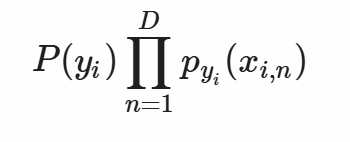

In [ ]:
#Prevendo a classe para um único ponto novo - exemplo
#Obs.: Neste exemplo, será utilizada a formulação com o produtório para ilustrar
x_test = [0.1, 0.2, 0.3] #Exemplo de um ponto novo
#probabilidade para classe 0 :
prob_0 = priors[0]*pdf_gaussian(x_test[0], means[0,0], variances[0,0])*pdf_gaussian(x_test[1], means[0,1], variances[0,1])*pdf_gaussian(x_test[2], means[0,2], variances[0,2])

#probabilidade para classe 1 :
prob_1 = priors[1]*pdf_gaussian(x_test[0], means[1,0], variances[1,0])*pdf_gaussian(x_test[1], means[1,1], variances[1,1])*pdf_gaussian(x_test[2], means[1,2], variances[1,2])

#probabilidade para classe 2 :
prob_2 = priors[2]*pdf_gaussian(x_test[0], means[2,0], variances[2,0])*pdf_gaussian(x_test[1], means[2,1], variances[2,1])*pdf_gaussian(x_test[2], means[2,2], variances[2,2])

#probabilidade para classe 3 :
prob_3 = priors[3]*pdf_gaussian(x_test[0], means[3,0], variances[3,0])*pdf_gaussian(x_test[1], means[3,1], variances[3,1])*pdf_gaussian(x_test[2], means[3,2], variances[3,2])

#normalizando:
prob_0_n = prob_0/(prob_0+prob_1+prob_2+prob_3)
prob_1_n = prob_1/(prob_0+prob_1+prob_2+prob_3)
prob_2_n = prob_2/(prob_0+prob_1+prob_2+prob_3)
prob_3_n = prob_3/(prob_0+prob_1+prob_2+prob_3)

print('Probabilidade de pertencer a classe 0:', prob_0_n)
print('Probabilidade de pertencer a classe 1:', prob_1_n)
print('Probabilidade de pertencer a classe 2:', prob_2_n)
print('Probabilidade de pertencer a classe 3:', prob_3_n)


Probabilidade de pertencer a classe 0: 1.6915168274737982e-05
Probabilidade de pertencer a classe 1: 2.2858776597895354e-07
Probabilidade de pertencer a classe 2: 0.0019605012394010163
Probabilidade de pertencer a classe 3: 0.9980223550045583


In [ ]:
#Gerando uma função de predição agora para permitir generalizar para qualquer ponto:
def predict(X, means, variances, priors): #Função para predição
    num_classes = len(priors)  #Número de classes
    num_features = X.shape[1]  #Número de atributos = número de colunas da matriz X
    posteriors = np.zeros((X.shape[0], num_classes))  # Armazena probabilidades para cada amostra: número de amostras = número de linhas da matriz X

    #Calculandos as probabilidades para cada combinação classe/atributo
    #Obs.: Neste caso, será utilizada a formulação com somatório (linearizada com log)
    for idx, sample in enumerate(X):
        for c in range(num_classes):
            prior = np.log(priors[c]) #Probabilidades a priori, calculadas antreriormente
            posterior = prior  #Prob. a posteriori inicializada com a probabilidade a priori
            for f in range(num_features):
                likelihood = np.log(pdf_gaussian(sample[f], means[c, f], variances[c, f])) #PDF associada com a classe c e atributo f
                posterior += likelihood #Atualizando a prob a posteriori, considerando somatório já que está sendo usada versão log
            posteriors[idx, c] = posterior  #Armazenando as probabilidades a posteriori para cada amostra e classe

    return np.argmax(posteriors, axis=1) #Retorna a classe com maior probabilidade: np.argmax

#Testando com o ponto criado anteriormente
a = predict(np.array([x_test]), means, variances, priors) #Precisa convertar para array para fechar dimensões!
print(a)

[3]


In [ ]:
# Predição das classes do conjunto de teste
y_pred = predict(X_test, means, variances, priors)

#Importanto métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculndo a acurácia, precisão, revocação (recall) e F1-score (média ponderada)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir as métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Revocação: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Exibir a matriz de confusão
print("Matriz de Confusão:")
print(conf_matrix)

Acurácia: 0.86
Precisão: 0.87
Revocação: 0.86
F1-Score: 0.86
Matriz de Confusão:
[[70  2  1  8]
 [ 0 55  1  6]
 [ 7  5 65  6]
 [ 3  1  2 68]]


In [ ]:
#Comparando com a função implementada no Sklearn
from sklearn.naive_bayes import GaussianNB

# Inicializando o modelo GaussianNB
gnb = GaussianNB()

# Treinando o modelo com o conjunto de treinamento
gnb.fit(X_train, y_train)

# Fazendo as previsões no conjunto de teste
y_pred_sklearn = gnb.predict(X_test)

# Calculando as métricas de avaliação
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted')
f1_sklearn = f1_score(y_test, y_pred_sklearn, average='weighted')

# Matriz de confusão
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

# Exibindo as métricas para o GaussianNB
print(f"Acurácia (GaussianNB): {accuracy_sklearn:.2f}")
print(f"Precisão (GaussianNB): {precision_sklearn:.2f}")
print(f"Revocação (GaussianNB): {recall_sklearn:.2f}")
print(f"F1-Score (GaussianNB): {f1_sklearn:.2f}")

# Exibindo a matriz de confusão
print("Matriz de Confusão (GaussianNB):")
print(conf_matrix_sklearn)

Acurácia (GaussianNB): 0.86
Precisão (GaussianNB): 0.87
Revocação (GaussianNB): 0.86
F1-Score (GaussianNB): 0.86
Matriz de Confusão (GaussianNB):
[[70  2  1  8]
 [ 0 55  1  6]
 [ 7  5 65  6]
 [ 3  1  2 68]]


#4) Naive Bayes Multinomial

Quando os atributos assumem valores categóricos e não contínuos, podemos determinar as probabilidades condicionais através da frequência de aparição de cada valor.


**Obs.:** As probabilidades a priori são calculadas da mesma forma!


Por exemplo, considere um caso onde as amostras pertençam duas classe (0 ou 1) e um dos atributos ($x_1$) pode assumir quatro valores distintos: $a, b, c$ ou $d$.

Por simplicidade, assuma que o conjuto de treinamento contém somente 20 amostras, 10 de cada classe. Primeiramente, devemos verificar a frequência dos valores em cada uma das categorias, com por exemplo ilustrado abaixo.





**Classe 0**:
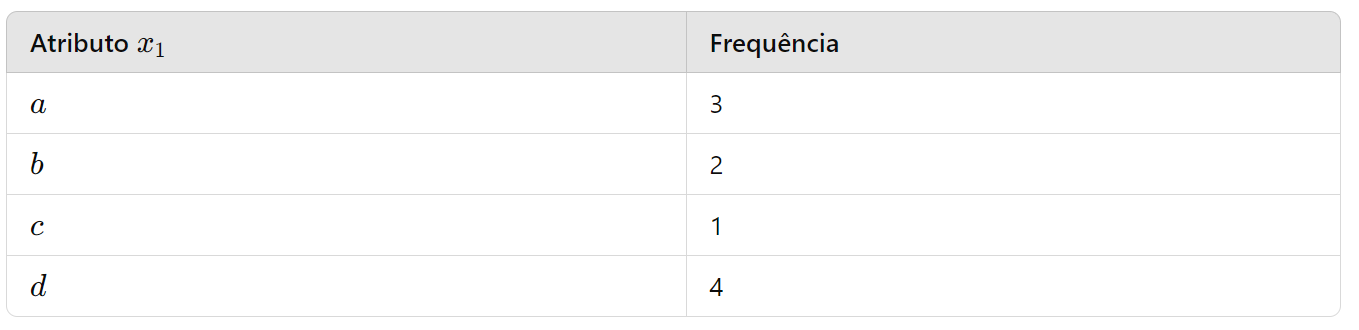

**Classe 1**:

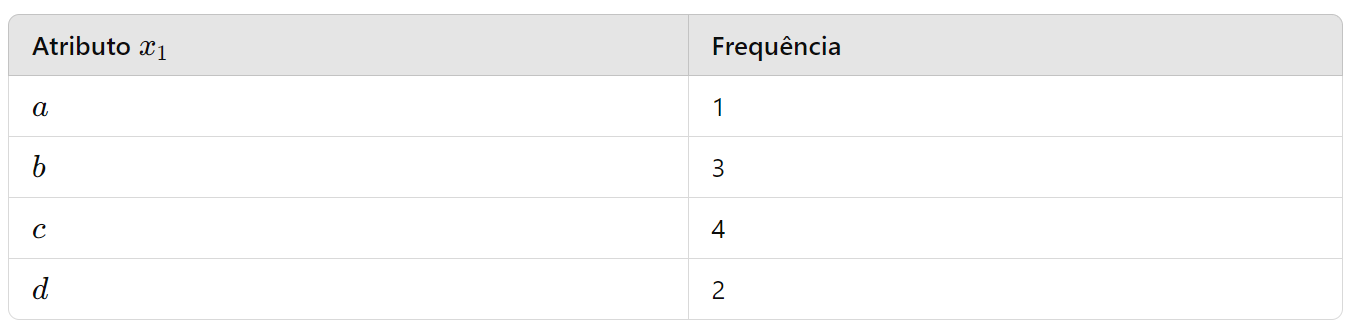

A probabilidades a priori podem ser calculadas com base no número de amostras em cada classe. Neste exemplo, existem 10 em cada classe, então:
$$
P(y=0) = P(y=1) = 0.5
$$

##4.1) Suavização de Laplace

Dependendo do conjunto de dados, existe uma grande chance de vários elementos retornarem uma frequência nula ou, se o conjunto de dados for muito grande, uma frequência muito pequena.

Para evitar problemas numéricos, é comum aplicar um procedimento de *suavização*, onde a probabilidade do atributo valer um determinado valor $x_1 = k$, dado que a amostra pertence à classe $y$ é calculada como:

$$
P(x_1 = k | y) = \dfrac{N_{yk} + \alpha}{N_y + \alpha n}
$$
onde:

*   $N_{yk} = $ número de vezes que o valor $k$ aparece nos dados pertencentes à calsse $y$;
*   $n = $ número de valores distintos que o atributo $x_1$ pode assumir (no exemplo, $n=4$)
*   $N_y = $ número de total de amostras pertencentes à classe $y$;
*   $\alpha \geq 0$ é um parâmetro de suavização. Normalmente, é definido $\alpha = 1$, levando à formulação chamama de *suavização de Laplace*.

$$
\,
$$

No conjunto de dados ilustrado anteriormente, teríamos as seguintes probabilidades associadas com a classe 0:

$$
P(x_1 = a | 0 ) = \frac{3 + 1}{10 + 4} \approx 0.29
$$
$$
P(x_1 = b | 0 ) = \frac{2 + 1}{10 + 4} \approx 0.21
$$

$$
P(x_1 = c | 0 ) = \frac{1 + 1}{10 + 4} \approx 0.14
$$

$$
P(x_1 = d | 0 ) = \frac{4 + 1}{10 + 4} \approx 0.36
$$

De modo semelhante, para a classe 1:

$$
P(x_1 = a |1 ) = \frac{1 + 1}{10 + 4} \approx 0.14
$$
$$
P(x_1 = b | 1 ) = \frac{3 + 1}{10 + 4} \approx 0.29
$$

$$
P(x_1 = c | 1 ) = \frac{4 + 1}{10 + 4} \approx 0.36
$$

$$
P(x_1 = d | 1 ) = \frac{2 + 1}{10 + 4} \approx 0.21
$$



##4.2) Classificação de novos pontos

Agora, podemos avaliar a probabilidade de um novo ponto pertecer a uma dada classe. Considere, por exemplo, que temos um novo ponto onde $x_1 = b$. Nesse caso:
$$
P(0|x_1 = b) \propto P(y=0) \times P(x_1 = b|0) = 0.105
$$

$$
P(1|x_1 = b) \propto P(y=1) \times P(x_1 = b|1) = 0.145
$$

Assim, o ponto seria classificado como pertencente à classe 1.

 Se existissem mais atributos, seria feita a multiplicação condicional de todos eles. Por exemplo, se tivéssemos dois atributos $x_1$ e $x_2$, para um novo ponto onde $x_1 = b$ e $x_2 = c$:

$$
P(0|x_1 = b, x_2 = c) \propto P(y=0) \times P(x_1 = b|0)\times P(x_2 = c|0)
$$


#Geração de dados para o trabalho

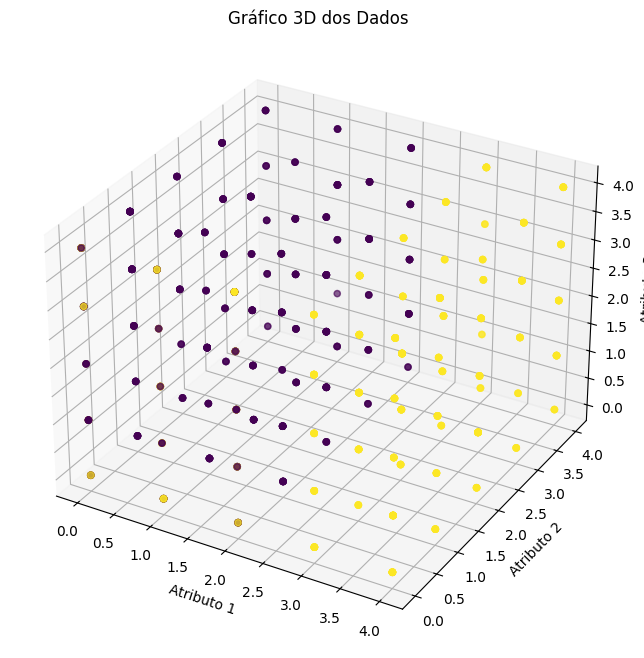

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Função para gerar amostras com seed fixo para garantir reprodutibilidade
def gerar_amostras_fixas(n_samples=1000, n_classes=2, n_attributes=3, n_values=5, seed = 42):
    np.random.seed(seed)

    # Gerando os dados e classes
    data = np.random.randint(0, n_values, size=(n_samples, n_attributes))
    classes = np.zeros(n_samples)
    #Números aleatórios para controlar distribuição dos pontos
    c1 = 3
    c2 = 1
    c3 = 1
    c4 = 2

    for i in range(n_samples):
      if data[i,0] < 3 - ((seed % c1)-c2)*np.random.uniform(0.5, 2) and data[i,1] > c3 - ((seed % c4))*np.random.uniform(0.85, 1.25):
        classes[i] = 0
      else:
        classes[i] = 1

    # Convertendo para DataFrame
    df = pd.DataFrame(data, columns=[f'Atributo{i+1}' for i in range(n_attributes)])
    df['Classe'] = classes
    return data, classes

# Gerando as amostras com a seed fixada
seed = 4861  #DEFINIR COMO 4 ÚLTIMOS DIGITOS DO CÓDIGO DE MATRÍCULA
X_ml, y_ml = gerar_amostras_fixas(seed = seed)


###################  GRÁFICOS PARA VISUALIZAÇÃO DOS PONTOS   ################################
# Criar o gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar os pontos, colorindo de acordo com a classe
scatter = ax.scatter(X_ml[:, 0], X_ml[:, 1], X_ml[:, 2], c=y_ml, cmap='viridis', marker='o')

# Adicionar legendas e títulos
ax.set_title('Gráfico 3D dos Dados')
ax.set_xlabel('Atributo 1')
ax.set_ylabel('Atributo 2')
ax.set_zlabel('Atributo 3')

plt.show()
